In [1]:
# https://www.kaggle.com/devinanzelmo/dota-2-matches

In [2]:
import os
import glob
import pandas as pd

In [3]:
data_dir = "/Users/spx8sk/personal/data/dota-kaggle/archive/"

In [4]:
glob.glob(data_dir + "/*")

['/Users/spx8sk/personal/data/dota-kaggle/archive/player_time.csv',
 '/Users/spx8sk/personal/data/dota-kaggle/archive/test_player.csv',
 '/Users/spx8sk/personal/data/dota-kaggle/archive/yasp_sample.json',
 '/Users/spx8sk/personal/data/dota-kaggle/archive/teamfights_players.csv',
 '/Users/spx8sk/personal/data/dota-kaggle/archive/item_ids.csv',
 '/Users/spx8sk/personal/data/dota-kaggle/archive/test_labels.csv',
 '/Users/spx8sk/personal/data/dota-kaggle/archive/chat.csv',
 '/Users/spx8sk/personal/data/dota-kaggle/archive/ability_upgrades.csv',
 '/Users/spx8sk/personal/data/dota-kaggle/archive/purchase_log.csv',
 '/Users/spx8sk/personal/data/dota-kaggle/archive/match.csv',
 '/Users/spx8sk/personal/data/dota-kaggle/archive/cluster_regions.csv',
 '/Users/spx8sk/personal/data/dota-kaggle/archive/players.csv',
 '/Users/spx8sk/personal/data/dota-kaggle/archive/hero_names.csv',
 '/Users/spx8sk/personal/data/dota-kaggle/archive/ability_ids.csv',
 '/Users/spx8sk/personal/data/dota-kaggle/archive/m

In [5]:
match_df = pd.read_csv(os.path.join(data_dir, "match.csv"))

In [6]:
match_df.head()

match_id  start_time  duration  tower_status_radiant  tower_status_dire  \
0         0  1446750112      2375                  1982                  4   
1         1  1446753078      2582                     0               1846   
2         2  1446764586      2716                   256               1972   
3         3  1446765723      3085                     4               1924   
4         4  1446796385      1887                  2047                  0   

   barracks_status_dire  barracks_status_radiant  first_blood_time  game_mode  \
0                     3                       63                 1         22   
1                    63                        0               221         22   
2                    63                       48               190         22   
3                    51                        3                40         22   
4                     0                       63                58         22   

   radiant_win  negative_votes  positive_votes  cluster  
0         True               0               1      155  
1        False               0               2      154  
2        False               0               0      132  
3        False               0               0      191  
4         True               0               0      156

In [7]:
import datetime

In [8]:
datetime.datetime.fromtimestamp(match_df['start_time'].values[0])

datetime.datetime(2015, 11, 5, 19, 1, 52)

In [9]:
match_df['radiant_win'].value_counts()

True     25943
False    24057
Name: radiant_win, dtype: int64

In [10]:
chat_df = pd.read_csv(os.path.join(data_dir, "chat.csv"))

In [11]:
chat_df[chat_df['match_id']==0]['key'].value_counts()

hah                                   5
wahaha                                2
haha                                  2
fate                                  1
u srsly?                              1
gG                                    1
TA?                                   1
that one i cant even run              1
is cruel                              1
we are losing                         1
hahah                                 1
why alyway hit me                     1
bye                                   1
but we dive much any other            1
wlwlwlwllww                           1
no 6k                                 1
space created                         1
no one to slay                        1
u stand in front of me                1
noes cape for him                     1
6k slayer                             1
lol                                   1
really ?                              1
cause u LIKE DENDI                    1
hahahhaHAHA                           1


In [12]:
value_counts_all_chat = chat_df['key'].value_counts()

In [13]:
pd.options.display.max_rows = 100

In [14]:
from IPython.display import display

In [15]:
# pd.set_option('display.max_rows', 500)
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10):
    display(value_counts_all_chat.to_frame().reset_index())

index    key
0                                   gg  65412
1                                  lol  27494
2                                    ?  19695
3                                gg wp  15431
4                                   GG  13473
...                                ...    ...
690809           you passed by me doom      1
690810  Q BURRO ERES PARA GANKEAR TUSK      1
690811   but that ud forget im centaur      1
690812          Report these 3 feeders      1
690813                             BAI      1

[690814 rows x 2 columns]

In [16]:
value_counts_all_chat

gg                                65412
lol                               27494
?                                 19695
gg wp                             15431
GG                                13473
                                  ...  
you passed by me doom                 1
Q BURRO ERES PARA GANKEAR TUSK        1
but that ud forget im centaur         1
Report these 3 feeders                1
BAI                                   1
Name: key, Length: 690814, dtype: int64

In [17]:
from wordcloud import WordCloud

In [18]:
# Start with one review:
text = chat_df['key'].values
text = list(text)
text = [str(t) for t in text]

In [19]:
text = " ".join(text)

In [20]:
import matplotlib.pyplot as plt

In [21]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

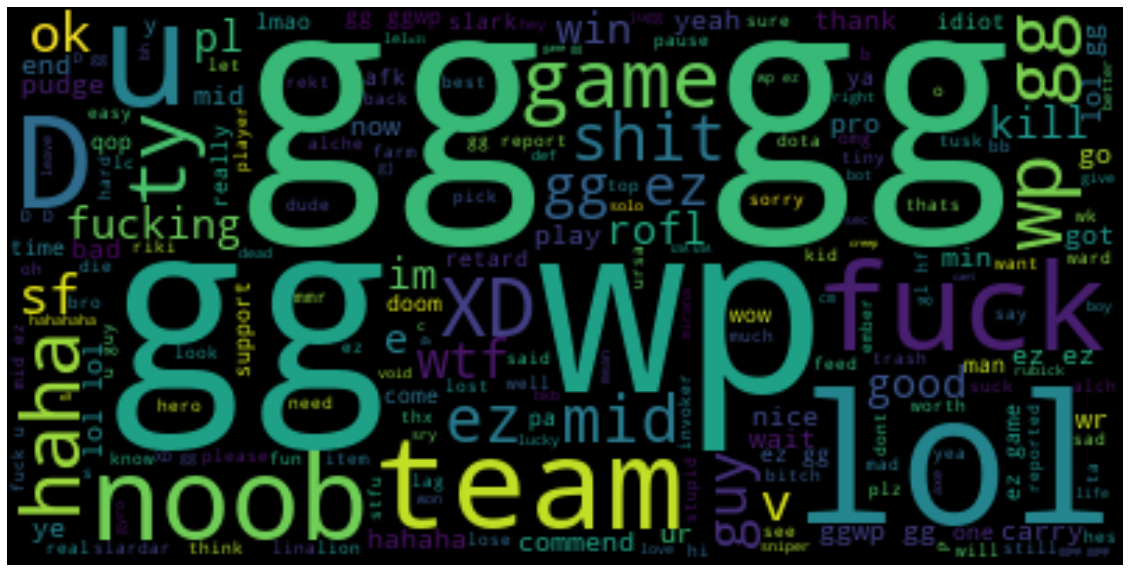

In [22]:
# Display the generated image:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
# https://stackoverflow.com/a/55049190/12840171
text = chat_df['key'].value_counts()

In [27]:
text.index = text.index.map(str)

In [45]:
[t for t in text.index[:50]]

['gg',
 'lol',
 '?',
 'gg wp',
 'GG',
 'ggwp',
 'ez',
 'haha',
 'LOL',
 ':D',
 'ty',
 'wp',
 'XD',
 'hahaha',
 'rofl',
 'xD',
 'ok',
 'xd',
 'EZ',
 'ez mid',
 ':)',
 'wtf',
 'g',
 'Gg',
 '+',
 'lmao',
 ')',
 'GGWP',
 'end',
 'no',
 'wow',
 'Ez',
 ':(',
 '??',
 'nice',
 'HAHA',
 'noob',
 'ROFL',
 'gege',
 'pls',
 'gl hf',
 'wait',
 '...',
 'yeah',
 'ff',
 'lel',
 'yes',
 'ez game',
 'Lol',
 'GG WP']

In [34]:
wordcloud.max_words

200

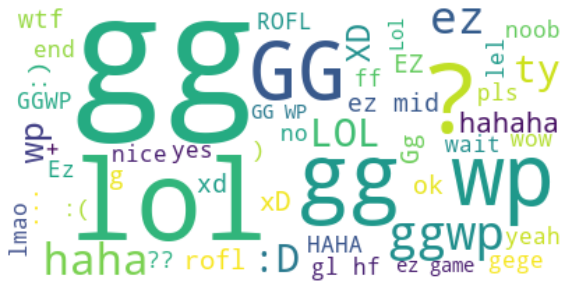

In [49]:
wordcloud = WordCloud(max_words=50, background_color='white').generate_from_frequencies(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()